<a href="https://colab.research.google.com/github/piegian99ita/machine_learning/blob/main/01_NumPy_and_Matplotlib_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial will guide you through the basics of the NumPy library. 

**Credits to**: Justin Johnson, Volodymyr Kuleshov, Isaac Caswell and Kevin Zakka, Stanford University.

Adapted for the **Introduction to Machine Learning Course** (Spring 2023) by Matteo Farina, University of Trento.   
Contact: [matteo.farina-1@unitn.it](mailto:matteo.farina-1@unitn.it)


#Introduction to Machine Learning, University of Trento - Preliminary Material
##Introduction to NumPy

prova 


##Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that some of you will have some experience with Python and NumPy; for the rest of you, this section will serve as a quick crash on the use of Python for scientific computing. You should've also been given an introductory Colab Notebook on Python (if not, please drop me an email!).

This notebook will cover:
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images

##Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
# here we 'alias' the NumPy library with the alias 'np'
import numpy as np

# this means we can reference NumPy typing 'np' instead of 'numpy'
np.__version__

dnksndankjdnkad

'1.22.4'

###Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
# Create a rank 1 array
a = np.array([1, 2, 3])
print("Type of the array:", type(a))
print("Rank of the array:", a.ndim)
print("Shape of the array:", a.shape)
print("The array itself:", a)

# access / change an element of the array
a[0] = 5
print("Now the array has changed:", a)                  

Type of the array: <class 'numpy.ndarray'>
Rank of the array: 1
Shape of the array: (3,)
The array itself: [1 2 3]
Now the array has changed: [5 2 3]


In [ ]:
# Create a rank 2 array
nested_list = [[1,2,3],
               [4,5,6]]
b = np.array(nested_list)
print("The array itself:\n", b)
print("Rank of the array:", b.ndim)
print("Shape of the array:", b.shape)

# access / change individual elements of the array
b[0,0] = 5
print("Now the array has changed:\n", b)

The array itself:
 [[1 2 3]
 [4 5 6]]
Rank of the array: 2
Shape of the array: (2, 3)
Now the array has changed:
 [[5 2 3]
 [4 5 6]]


Numpy also comes with several utility function to create arrays. You are highly encouraged to check the official [NumPy documentation](https://numpy.org/doc/stable/user/absolute_beginners.html)!

In [ ]:
# Create an array of all zeros
a = np.zeros(shape=(2,2))
print(a)

[[0 0]
 [0 0]]


In [ ]:
# Create an array of all ones
b = np.ones(shape=(1, 2))
print(b)

[[1. 1.]]


In [ ]:
# Create a constant array
c = np.full((2,2), 7)
print(c)

[[7 7]
 [7 7]]


In [ ]:
# Create a 2x2 identity matrix
d = np.eye(2)        
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
# Create a 2x2 array of random values in [0.0, 1.0)
e = np.random.random((2,2))
print(e)

[[0.49019289 0.47530457]
 [0.19149244 0.77089105]]


###Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to extract the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array.

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[4 5 6] (3,)
[[4 5 6]] (1, 3)
[[4 5 6]] (1, 3)


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  5  8 11] (4,)

[[ 2]
 [ 5]
 [ 8]
 [11]] (4, 1)


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
all_rows = np.arange(4)  # creates [0 1 2 3]
col_idxs = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in col_idxs
print(a[all_rows, col_idxs]) 

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
# This is useful when the same operation must be applied to more cells!
a[all_rows, col_idxs] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


A popular method to operate with boolean indices is to use ```np.where```.
This function is flexible, and some snippets of its usage are reported below.

In [ ]:
# when evaluating a condition, it returns a tuple with the same 
# rank as the input array, containing the indices satisfying the condition. 
# The below is equivalent to a[a > 2]
indices = np.where(a > 2)
a[indices]

# you can use np.where to generate a new array. This creates a new array
# with the same shape of a. Elements where a is gt 2 are clipped, the 
# others are left unchanged.
clipped_a = np.where(a > 2, 2, 0)
print("Original a:\n", a)
print("Clipping a values if gt 2:\n", clipped_a)

Original a:
 [[1 2]
 [3 4]
 [5 6]]
Clipping a values if gt 2:
 [[0 0]
 [2 2]
 [2 2]]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

###Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

# the datatype is stored in the 'dtype' field of numpy arrays.
print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product (sometimes called the Hadamard product).
# Both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Attention! `*` is elementwise multiplication, not matrix multiplication. We instead use the ```np.dot``` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. ```np.dot``` is equivalent to ```np.matmul``` for arrays with rank 2. A common notation is to substitute ```np.dot``` or ```np.matmul``` with the ```@``` character, leading to the same output.

In [ ]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; all produce 219
print(v.dot(w))
print(np.dot(v, w))
print(np.matmul(v,w))
print(v @ w)

219
219
219
219


```np.dot``` and ```np.matmul``` are complex functions, with a lot of special cases to take into account, especially when the rank of the arrays do not match. Please have a look at their documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot) and [here](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul).

In [ ]:
# Matrix / vector product; all produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(np.matmul(x, v))
print(x @ v)

ValueError: ignored

In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print("\ninner dot method:\n", x.dot(y))
print("\nnp.dot function:\n", np.dot(x, y))
print("\nnp.matmul function:\n",np.matmul(x, y))
print("\n@ notation:\n", x @ y)


inner dot method:
 94.25722892767537

np.dot function:
 94.25722892767537

np.matmul function:
 94.25722892767537

@ notation:
 94.25722892767537


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))          # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print("x\n", x)
print("\ntranspose of x\n", x.T)

x
 [[1 2]
 [3 4]]

transpose of x
 [[1 3]
 [2 4]]


In [ ]:
# the concept of transpose leaves 1D arrays unchanged.
v = np.arange(10)
vt = v.T
print("v = ", v)
print("transpose of v = ", vt)

# however, if they are rank2 arrays, although containing the same data
# as 1D vectors, they can be converted from row vectors to column vectors and 
# viceversa
v = np.expand_dims(v, axis=0)
print("\nv as a row vector =", v, v.shape)
print("\n v as a column vector = \n", v.T, v.T.shape)

v =  [0 1 2 3 4 5 6 7 8 9]
transpose of v =  [0 1 2 3 4 5 6 7 8 9]

v as a row vector = [[0 1 2 3 4 5 6 7 8 9]] (1, 10)

 v as a column vector = 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] (10, 1)


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

##Matplotlib

Matplotlib is a plotting library, which serves for the purpose of **Data Visualization**. 
Specifically, during the course we will use the ```matplotlib.pyplot``` submodule, which follows many of the standard practices to plot data in MATLAB.

In [ ]:
import matplotlib.pyplot as plt

The following line is needed to display plots in the output cells of Google Colab notebooks. You will see this on top of Notebook throughout the course.

In [ ]:
%matplotlib inline

###Plotting

The most important function in `pyplot` is ```plot```, which allows you to plot 2D data. Here is a simple example:

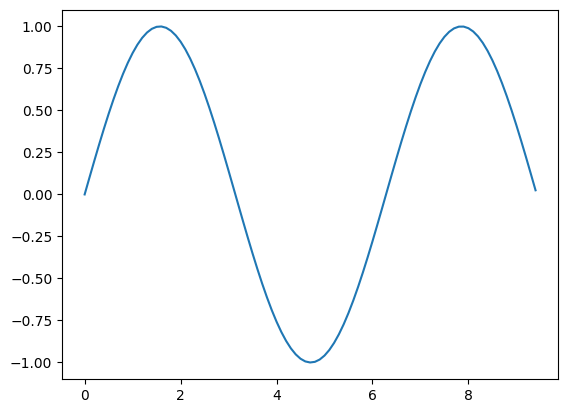

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y); plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

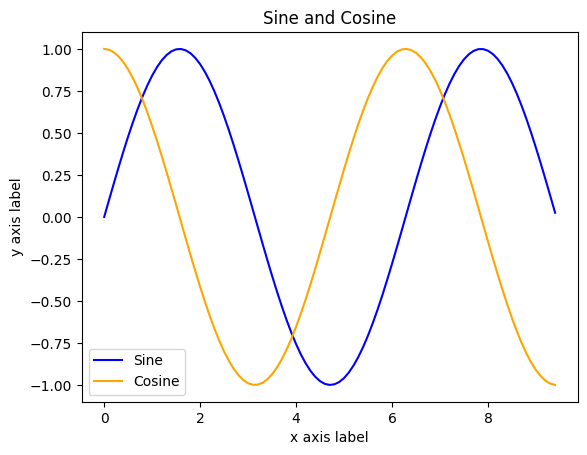

In [ ]:
# compute the sin and cos for each value in the x array
y_sin = np.sin(x)
y_cos = np.cos(x)

# draw the sine and cosine curves
# the 'label' value will be displayed in the plot legend
plt.plot(x, y_sin, label="Sine", color="blue")
plt.plot(x, y_cos, label="Cosine", color="orange")

# define the strings to label the x and the y axes
plt.xlabel('x axis label')
plt.ylabel('y axis label')

# assign a title to the current plot
plt.title('Sine and Cosine')

# display the legend and show the figure
plt.legend(); plt.show()

###Subplots 

A powerful feature in ```pyplot``` is **subplotting**, which allows you to partition the plot and display different data all at once in the same figure.
The positional arguments of subplot are:
- **nrows**: the number of rows of your plot;
- **ncols**: the number of columns of your plot;
- **index**: which sets the current partition you are working on;  

Indexing subplots works along the rows: i.e. if you have 2 rows and 2 columns,
your 2x2 grid can be accessed follows:
1. index of the 1st row and 1st column;
2. index of the first row and 2nd column;
3. index of the second row, first column;
4. index of the second row, second column

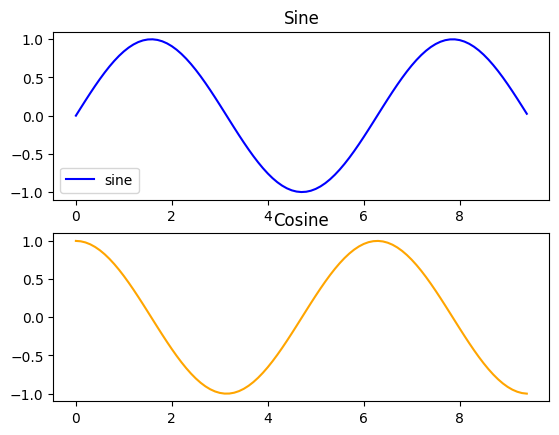

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# add a new figure within the current one. Now we have 2 figures, stacked
# vertically (since nrows=2 and ncols=1). The last positional argument equal
# to 1 sets our drawing on the top subfigure.   
plt.subplot(2, 1, 1)

# Make the upper plot
plt.plot(x, y_sin, label="sine", color="blue")
plt.title('Sine')
plt.legend()

# Now, we reference the second plot, with the same subplot function as before
# but with a different index
plt.subplot(2, 1, 2)
plt.plot(x, y_cos, label='Cosine', color='orange')
plt.title('Cosine')

# Show the figure.
plt.show()

Notice that in the previous plot, the legend is the displayed only in the upper subfigure. This is because we called ```plt.legend``` when referencing the 1st subfigure, i.e. after calling ```plt.subplot(2,1,1)```, but not when referencing the 2nd subfigure (i.e. before calling ```plt.subplot(2,1,2)```).

This behaviour should give you a glimpse about the fact that subfigures are treated independently when using ```plt.subplot```. An equivalent way of achieving the same plot would be by using ```plt.subplots```.

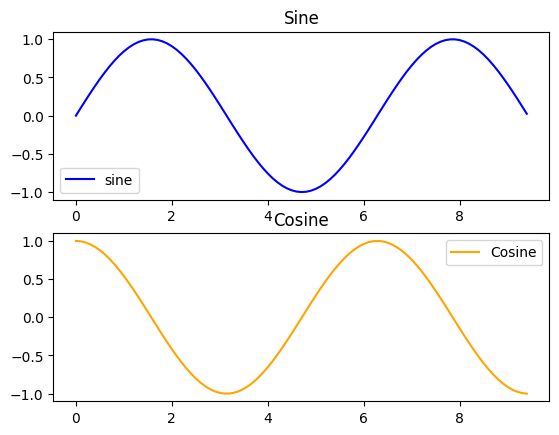

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# Make the upper plot
ax1.plot(x, y_sin, label="sine", color="blue")
ax1.set_title('Sine')
ax1.legend()

# Make the lower plot
ax2.plot(x, y_cos, label='Cosine', color='orange')
ax2.set_title('Cosine')
ax2.legend()

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

Matplotlib comes with several functions for data plotting, such as ```plt.pie``` for Pie Charts, ```plt.bar``` for Bar Charts, ```plt.scatter``` for Scatter Plots and many, many more. 